In [2]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

import matplotlib.pyplot as plt
from matplotlib import colors, cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

# importing system packages
import os
import sys
import glob
import h5py
import time
import itertools

# importing the workhorse
import numpy as np
import pandas as pd
from scipy import io, signal, interpolate

# tiff packages
#from PIL import Image
import tifffile

from lmfit import Minimizer, Parameters, report_fit

from SACLA_utils import *
from fit2D import *

## Loading data and define ROI (in pixels)

(725, 700)

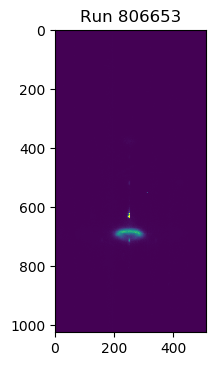

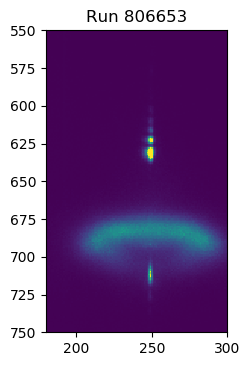

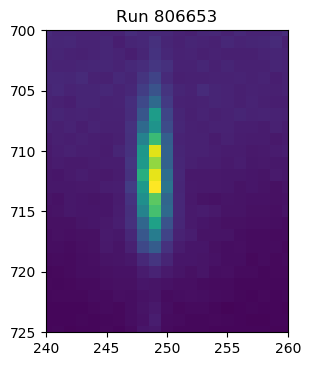

In [3]:
runID = 806653
bgID = -1
tiffStk = bgRemoval(runID, bgID)

plt.figure()
plt.imshow(tiffStk['before'], vmin=0, vmax=150000)
plt.title('Run '+str(runID))

plt.figure()
plt.imshow(tiffStk['before'], vmin=0, vmax=200000)
plt.title('Run '+str(runID))
plt.xlim([180, 300])
plt.ylim([750, 550])

plt.figure()
plt.imshow(tiffStk['before'], vmin=0, vmax=200000)
plt.title('Run '+str(runID))
plt.xlim([240, 260])
plt.ylim([725, 700])

## Fitting to 2D Gaussian

In [4]:
img = tiffStk['before']
ROI=[240, 260, 700, 725]

x = np.arange(img.shape[1])
y = np.arange(img.shape[0])

params = guess_Gauss2D(x[240:260], y[700:725], img[700:725, 240:260])
print('********** Initial guess **********')
params

********** Initial guess **********


name,value,initial value,min,max,vary
Area,7752305.75,7752305.754886917,-inf,inf,True
sigma_x,3.00000000,3.0,-inf,inf,True
sigma_y,2.00000000,2.0,-inf,inf,True
cen_x,249.000000,249,-inf,inf,True
cen_y,713.000000,713,-inf,inf,True
BG_slope_x,-217.544768,-217.54476768092104,-inf,inf,True
BG_slope_y,-302.709513,-302.7095133463542,-inf,inf,True
BG_const,2661.76611,2661.766,-inf,inf,True


[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 67
    # data points      = 500
    # variables        = 8
    chi-square         = 5.7318e+09
    reduced chi-square = 11649980.0
    Akaike info crit   = 8143.34282
    Bayesian info crit = 8177.05968
[[Variables]]
    Area:        3390279.32 +/- 31849.9549 (0.94%) (init = 7752306)
    sigma_x:     0.80050642 +/- 0.00680533 (0.85%) (init = 3)
    sigma_y:     3.73503171 +/- 0.03326567 (0.89%) (init = 2)
    cen_x:       248.838463 +/- 0.00709688 (0.00%) (init = 249)
    cen_y:       712.037500 +/- 0.03322781 (0.00%) (init = 713)
    BG_slope_x: -74.7022067 +/- 26.5389602 (35.53%) (init = -217.5448)
    BG_slope_y: -739.441068 +/- 21.5976912 (2.92%) (init = -302.7095)
    BG_const:    558948.483 +/- 16743.8357 (3.00%) (init = 2661.766)
[[Correlations]] (unreported correlations are < 0.100)
    C(BG_slope_y, BG_const) = -0.918
    C(Area, sigma_y)        =  0.533
    C(Area, sigma_x)        =  0.522
    C(BG_s

,value,err
Area,3.390279e+06,31849.954906
sigma_x,8.005064e-01,0.006805
sigma_y,3.735032e+00,0.033266
cen_x,2.488385e+02,0.007097
cen_y,7.120375e+02,0.033228
BG_slope_x,-7.470221e+01,26.538960
BG_slope_y,-7.394411e+02,21.597691
BG_const,5.589485e+05,16743.835734


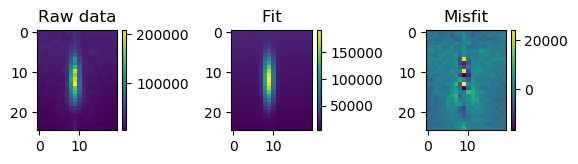

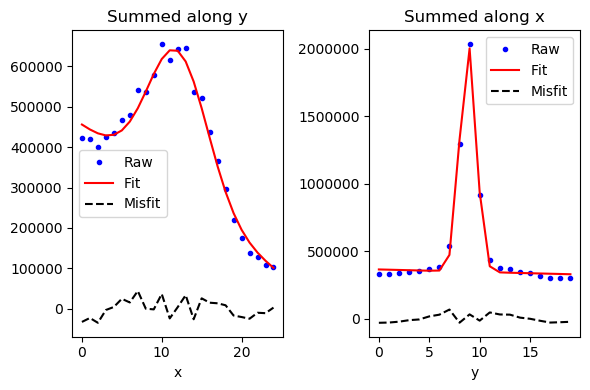

In [7]:
fit_params, _, _, _, _, _, _ = do_fit2D(x, y, img, Gauss2D, guess_Gauss2D, ROI=ROI, verbose=True, plotFit=True)
print('********** Fitted **********')
fit_params

## Fitting to 2D Lorentzian

In [8]:
img = tiffStk['before']
ROI=[240, 260, 700, 725]

x = np.arange(img.shape[1])
y = np.arange(img.shape[0])

param = guess_Lor2D(x[240:260], y[700:725], img[700:725, 240:260])
print('********** Initial guess **********')
param

********** Initial guess **********


name,value,initial value,min,max,vary
Height,205636.297,205636.3,-inf,inf,True
FWHM_x,6.00000000,6,-inf,inf,True
FWHM_y,4.00000000,4,-inf,inf,True
cen_x,249.000000,249,-inf,inf,True
cen_y,713.000000,713,-inf,inf,True
BG_slope_x,-217.544768,-217.54476768092104,-inf,inf,True
BG_slope_y,-302.709513,-302.7095133463542,-inf,inf,True
BG_const,2661.76611,2661.766,-inf,inf,True


[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 91
    # data points      = 500
    # variables        = 8
    chi-square         = 1.5324e+10
    reduced chi-square = 31146346.5
    Akaike info crit   = 8635.03906
    Bayesian info crit = 8668.75593
[[Variables]]
    Height:      238270.914 +/- 6473.15823 (2.72%) (init = 205636.3)
    FWHM_x:      1.28743392 +/- 0.04047210 (3.14%) (init = 6)
    FWHM_y:      6.16992465 +/- 0.15522648 (2.52%) (init = 4)
    cen_x:       248.741810 +/- 0.01369894 (0.01%) (init = 249)
    cen_y:       712.053780 +/- 0.05184747 (0.01%) (init = 713)
    BG_slope_x:  28.9579711 +/- 43.5695713 (150.46%) (init = -217.5448)
    BG_slope_y: -741.568107 +/- 35.2569239 (4.75%) (init = -302.7095)
    BG_const:    529835.363 +/- 27360.5303 (5.16%) (init = 2661.766)
[[Correlations]] (unreported correlations are < 0.100)
    C(BG_slope_y, BG_const) = -0.917
    C(Height, FWHM_x)       = -0.839
    C(Height, FWHM_y)       = -0.769
    C(He

,value,err
Height,238270.913951,6473.158230
FWHM_x,1.287434,0.040472
FWHM_y,6.169925,0.155226
cen_x,248.741810,0.013699
cen_y,712.053780,0.051847
BG_slope_x,28.957971,43.569571
BG_slope_y,-741.568107,35.256924
BG_const,529835.362536,27360.530261


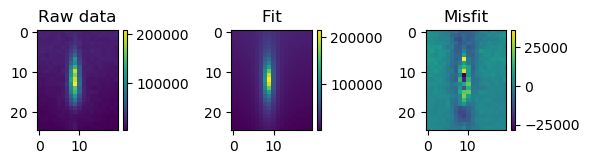

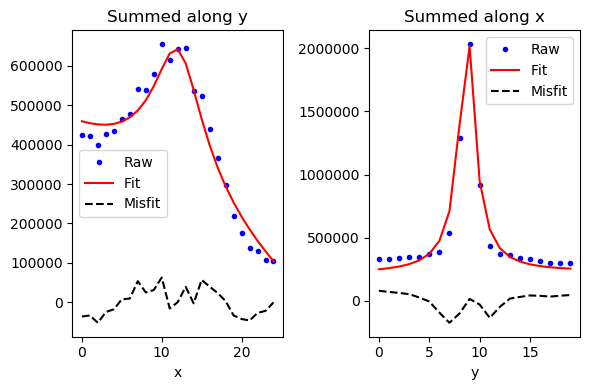

In [9]:
fit_params, _, _, _, _, _, _ = do_fit2D(x, y, img, Lor2D, guess_Lor2D, ROI=ROI, verbose=True, plotFit=True)
print('********** Fitted **********')
fit_params

## Conclusion

In the case of the CTR, the anisotropic Gaussian is a better choice. For other short-range orders, we may wish to consider 2D Lorentzian. If an isotropic Gaussian/Lorentzian is needed, new code is needed.